<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/WS_zad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Zaczniemy od zaimportowania danych pogodowych (średnia temperatura w styczniu danego roku w przedziale 1953-2018) z Houston w Texasie do ramki:

In [208]:
df = pd.read_csv('data_temperature.csv')
df

,Houston,Texas January Average Temperature
0,Units: Degrees Fahrenheit,NaN
1,Missing: -99,NaN
2,Date,Value
3,195301,57.2
4,195401,56.9
...,...,...
64,201401,51.5
65,201501,51.0
66,201601,54.4
67,201701,61.2


# Widzimy, że 3 pierwsze wiersze danych to informacje o danych. Możemy je zatem usunąć z naszej ramki danych. Resetujemy również indeksowanie wierszy dla większej przejrzystości danych.

In [209]:
df = df.drop(range(3))
df = df.reset_index(drop=True)
df.head()

,Houston,Texas January Average Temperature
0,195301,57.2
1,195401,56.9
2,195501,54.6
3,195601,54.7
4,195701,58.3


# Zmienimy teraz nazwy kolumn na polskie

In [210]:
df.columns = ['Data','Temperatura']
df.head()

,Data,Temperatura
0,195301,57.2
1,195401,56.9
2,195501,54.6
3,195601,54.7
4,195701,58.3


# Spreparujemy datę, aby była w odpowiednim formacie

In [211]:
df['Data'] = df['Data'].astype(str)
df['Data'] = df['Data'].apply(lambda x: x[:4])
df['Data'] = df['Data'].astype(int)
df.head()

,Data,Temperatura
0,1953,57.2
1,1954,56.9
2,1955,54.6
3,1956,54.7
4,1957,58.3


In [212]:
df.dtypes

Data            int64
Temperatura    object
dtype: object

# Jak widac trzeba zmienic jeszcze typ danych kolumny temperatura na float

In [213]:
df['Temperatura'] = df['Temperatura'].astype(float)
df.dtypes

Data             int64
Temperatura    float64
dtype: object

# Teraz sprawdzimy brakujące wartości

In [214]:
df[df.isna().any(axis=1)]

,Data,Temperatura


# Nie mamy brakujących wartości. To dobrze. Możemy skonwertować temperaturę do stopni według skali Celsjusza

In [215]:
df['Temperatura'] = df['Temperatura'].apply(lambda x: round((x -32) *5/9,1))
df.head()

,Data,Temperatura
0,1953,14.0
1,1954,13.8
2,1955,12.6
3,1956,12.6
4,1957,14.6


# Statystyki opisowe ramki:

In [216]:
df.describe()

,Data,Temperatura
count,66.000000,66.000000
mean,1985.500000,10.972727
std,19.196354,10.694377
min,1953.000000,-72.800000
25%,1969.250000,10.450000
50%,1985.500000,12.350000
75%,2001.750000,13.875000
max,2018.000000,16.200000


In [217]:
df.loc[df['Temperatura'].idxmin()]

Data           1990.0
Temperatura     -72.8
Name: 37, dtype: float64

In [218]:
df.sort_values(by='Temperatura')

,Data,Temperatura
37,1990,-72.8
25,1978,6.8
26,1979,7.4
24,1977,7.6
32,1985,9.4
...,...,...
36,1989,15.4
59,2012,15.6
45,1998,15.6
53,2006,15.7


# Widzimy, że statystyka opisowa powinna się zgadzać, ale w 1990 musiał wyniknąć błąd pomiarowy. Ciekawa sytuacja.

# Możemy przystąpić do regresji liniowej. Zaczniemy od zaimportowania modułu regresji z biblioteki SciPy oraz stworzeniem modelu dla naszych danych

In [219]:
from scipy import stats

In [220]:
regresja = stats.linregress(x=df.Data, y=df.Temperatura)

# Spróbujmy zrobić prognozowanie pogody w Houston na 2022 rok:

In [221]:
prognoza = round(regresja.slope * 2022 + regresja.intercept,1)
prognoza

11.1

# Prognoza jest satysfakcjonująca. Sprawdźmy poprawność z danymi historycznymi:

In [222]:
df2 = pd.read_csv('data_really_2022.csv', skiprows=3)
df2.columns = ['Data','Temperatura']
df2['Data'] = df2['Data'].astype(str)
df2['Data'] = df2['Data'].apply(lambda x: x[:4])
df2['Data'] = df2['Data'].astype(int)
df2['Temperatura'] = df2['Temperatura'].astype(float)
df2['Temperatura'] = df2['Temperatura'].apply(lambda x: round((x -32) *5/9,1))
df2

,Data,Temperatura
0,2022,12.4


# Jak widzimy dane otoczone są błędem około 1.3 stopnia Celsjusza. Biorąc pood uwagę, że była to prognoza w parę lat w przód, nie wypadła jakoś źle. Spróbujmy zwizualizować nasze dane i pokazać prognozowaną i rzeczywistą temperaturę

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
sns.set(style="whitegrid")

In [225]:
df2_list = df2.values.tolist()
temp_2018 = df[df['Data'] == 2018]['Temperatura'].values[0]

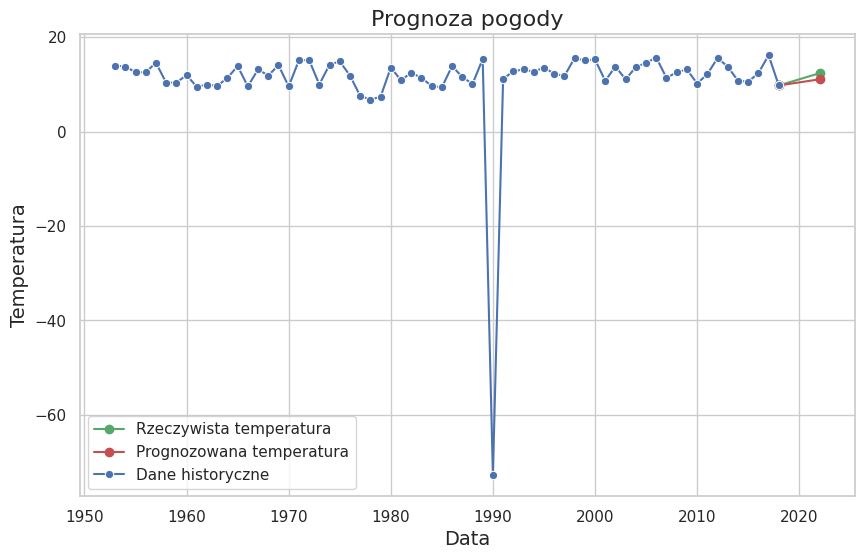

In [226]:
plt.figure(figsize=(10, 6))
plt.plot([2018,2022],[temp_2018,df2_list[0][1]],c = 'g', marker='o', label="Rzeczywista temperatura")
plt.plot([2018,2022],[temp_2018,prognoza],c = 'r', marker='o', label="Prognozowana temperatura")
sns.lineplot(x='Data', y='Temperatura', data=df, marker='o', label="Dane historyczne")
plt.title('Prognoza pogody', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Temperatura', fontsize=14)
plt.legend()
plt.show()

# Spróbujmy pokazać urywek wykresu z racji na tą dziwną odstającą daną:

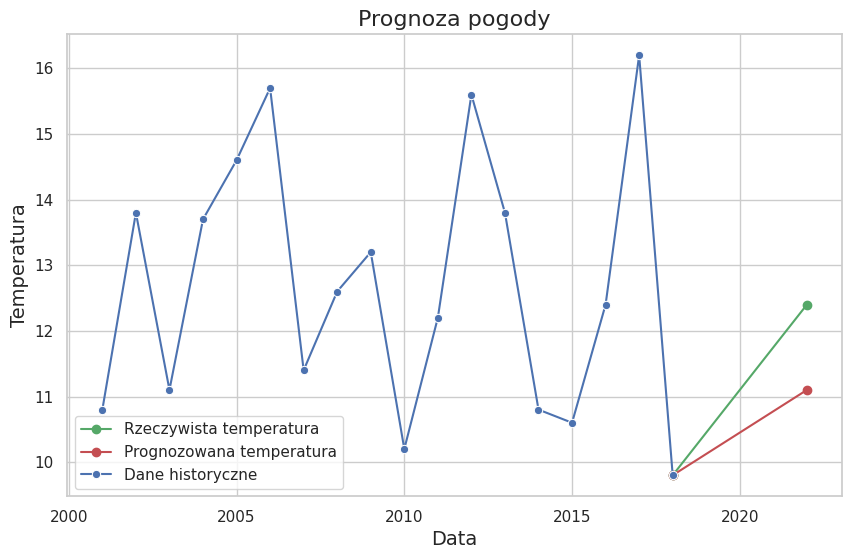

In [227]:
df_sub = df[df['Data'] > 2000]
plt.figure(figsize=(10, 6))
plt.plot([2018,2022],[temp_2018,df2_list[0][1]],c = 'g', marker='o', label="Rzeczywista temperatura")
plt.plot([2018,2022],[temp_2018,prognoza],c = 'r', marker='o', label="Prognozowana temperatura")
sns.lineplot(x='Data', y='Temperatura', data=df_sub, marker='o', label="Dane historyczne")
plt.title('Prognoza pogody', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Temperatura', fontsize=14)
plt.legend()
plt.show()